# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "boston"
city_url = f"{url}appid={weather_api_key}&q={city}"
response = requests.get(city_url.replace(" ","&"))
city_weather = response.json()
city_weather

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 271.87,
  'feels_like': 270.11,
  'temp_min': 269.61,
  'temp_max': 273.94,
  'pressure': 1025,
  'humidity': 85},
 'visibility': 10000,
 'wind': {'speed': 1.4, 'deg': 40, 'gust': 2.1},
 'clouds': {'all': 35},
 'dt': 1707360783,
 'sys': {'type': 2,
  'id': 2001997,
  'country': 'US',
  'sunrise': 1707306710,
  'sunset': 1707343495},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url.replace(" ","&"))
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bac lieu
Processing Record 2 of Set 1 | meknes
Processing Record 3 of Set 1 | santa cruz de tenerife
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | palikir - national government center
Processing Record 7 of Set 1 | lazaro cardenas
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | yaren
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | iskateley
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | yarmolyntsi
Processing Record 17 of Set 1 | barretos
Processing Record 18 of Set 1 | espargos
City not found. Skipping...
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | grytviken
Processing Recor

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          519
Lat           519
Lng           519
Max Temp      519
Humidity      519
Cloudiness    519
Wind Speed    519
Country       519
Date          519
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bac lieu,45.3919,19.2367,281.33,79,92,3.26,RS,1707361168
1,meknes,33.9776,-5.5250,280.64,56,0,4.12,MA,1707361349
2,santa cruz de tenerife,17.4860,120.4348,302.05,93,4,2.56,PH,1707361326
3,port-aux-francais,-49.3500,70.2167,277.53,71,80,12.36,TF,1707361145
4,bethel,41.3712,-73.4140,275.67,65,100,2.06,US,1707361141


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bac lieu,45.3919,19.2367,281.33,79,92,3.26,RS,1707361168
1,meknes,33.9776,-5.5250,280.64,56,0,4.12,MA,1707361349
2,santa cruz de tenerife,17.4860,120.4348,302.05,93,4,2.56,PH,1707361326
3,port-aux-francais,-49.3500,70.2167,277.53,71,80,12.36,TF,1707361145
4,bethel,41.3712,-73.4140,275.67,65,100,2.06,US,1707361141


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

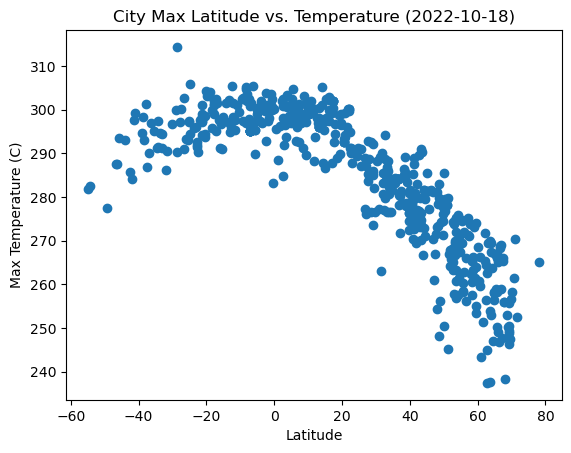

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

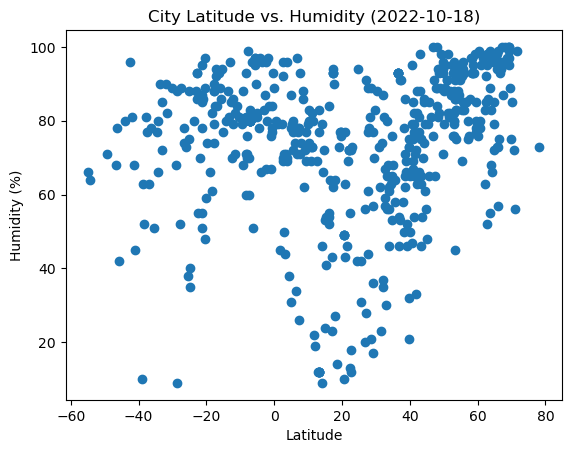

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

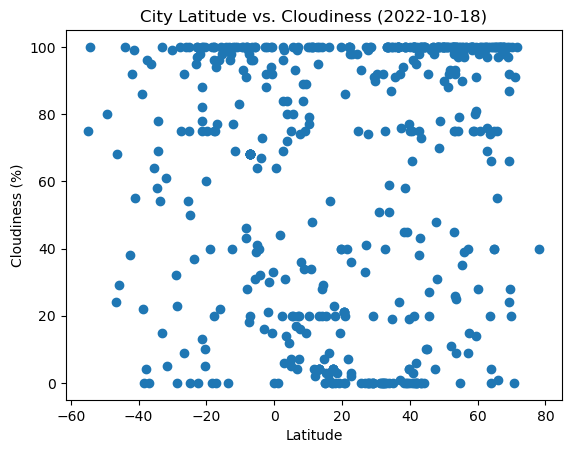

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

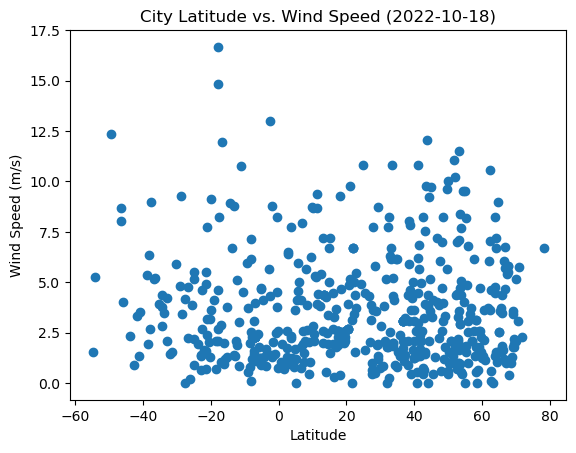

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y"

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bac lieu,45.3919,19.2367,281.33,79,92,3.26,RS,1707361168
1,meknes,33.9776,-5.5250,280.64,56,0,4.12,MA,1707361349
2,santa cruz de tenerife,17.4860,120.4348,302.05,93,4,2.56,PH,1707361326
4,bethel,41.3712,-73.4140,275.67,65,100,2.06,US,1707361141
5,palikir - national government center,6.9248,158.1611,300.29,77,100,7.95,FM,1707361139


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,277.53,71,80,12.36,TF,1707361145
7,ushuaia,-54.8000,-68.3000,281.94,66,75,1.54,AR,1707361152
8,adamstown,-25.0660,-130.1015,297.35,75,100,5.52,PN,1707360803
9,yaren,-0.5472,166.9160,302.40,78,100,8.25,NR,1707361350
10,papatowai,-46.5619,169.4708,287.53,68,24,8.68,NZ,1707361157


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.894824178534589
The rsquared-value is: 0.8007103104901019


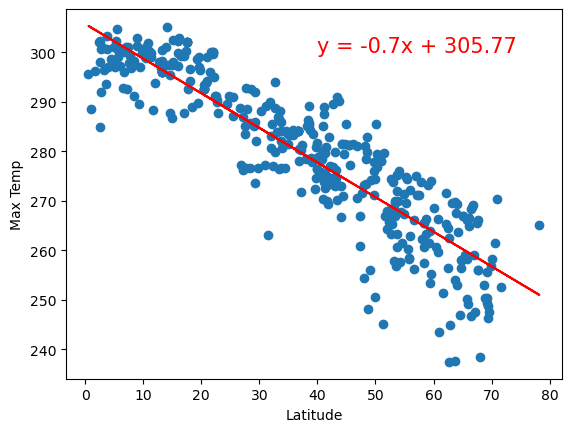

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
r_squared = rvalue**2

# Plot the values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,300),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
print(f"The rsquared-value is: {r_squared}")

The r-value is: 0.49834115262801526
The rsquared-value is: 0.2483439044026188


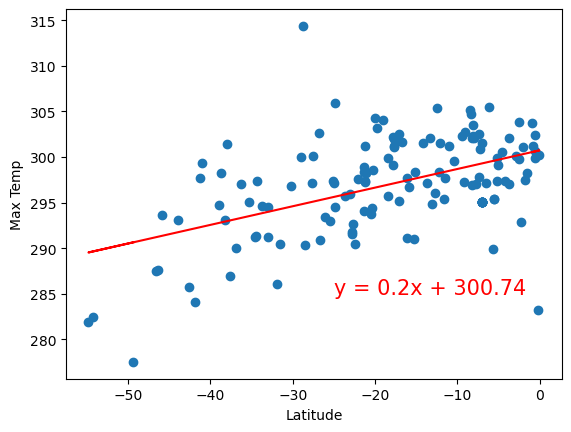

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
r_squared = rvalue**2

# Plot the values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,285),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
print(f"The rsquared-value is: {r_squared}")

Discussion about the linear relationship: In the Northern Hemisphere, 72% of the changes in Max Temperature can be explained by changes in Latitude. The r-value is roughly -0.85, meaning that there is a very strong, negative correlation betwee Latitude and Max Temperature. 
In the Southern Hemisphere, 25% of the changes in Max Temperature can be explained by changes in Latitude. The Southern Hemisphere's r-value is roughly 0.50, meaning that there is a moderately positive correlation between Latitude and Max Temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.45587303547604163
The rsquared-value is: 0.2078202244741403


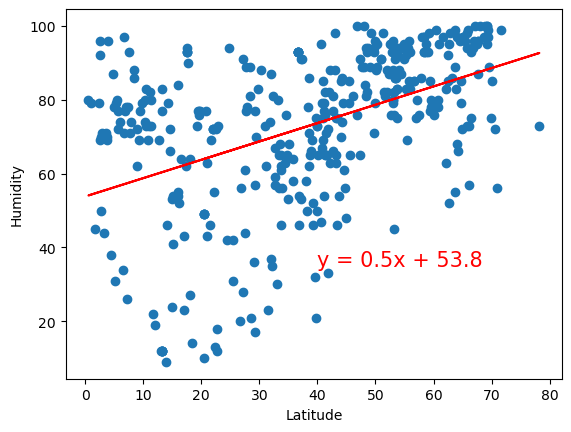

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
r_squared = rvalue**2

# Plot the values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
print(f"The rsquared-value is: {r_squared}")

The r-value is: 0.3385131824506844
The rsquared-value is: 0.11459117469289035


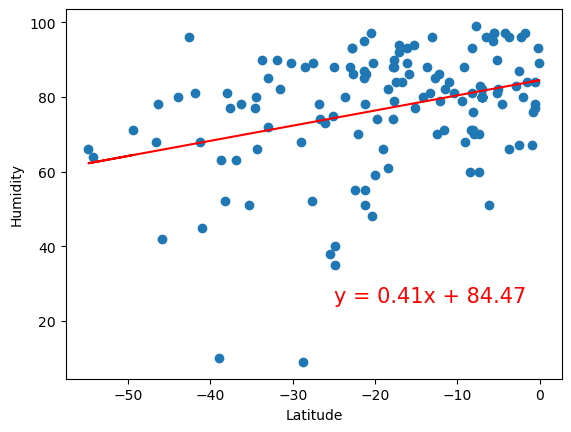

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
r_squared = rvalue**2
 
# Plot the values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
print(f"The rsquared-value is: {r_squared}")

Discussion about the linear relationship: In the Northern Hemisphere, 19% of the changes in Humidity can be explained by changes in Latitude. The r-value is roughly 0.44, meaning that there is a moderately positive correlation betwee Latitude and Humidity. 
In the Southern Hemisphere, 19% of the changes in Humidity can be explained by changes in Latitude. The Southern Hemisphere's r-value is roughly 0.43, meaning that there is a moderately positive correlation between Latitude and Humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3492759731695848
The rsquared-value is: 0.12199370543356053


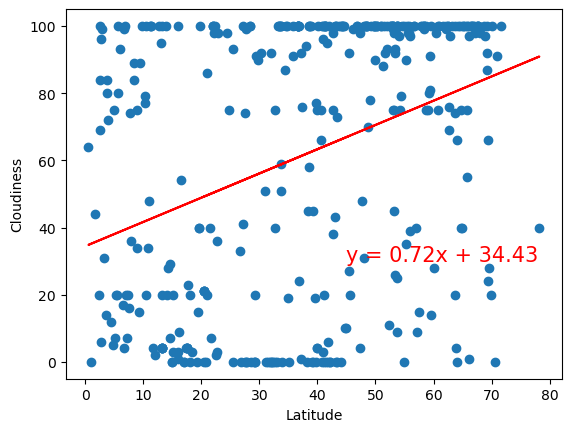

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
r_squared = rvalue**2

# Plot the values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
print(f"The rsquared-value is: {r_squared}")

The r-value is: 0.09285760597805073
The rsquared-value is: 0.008622534987974924


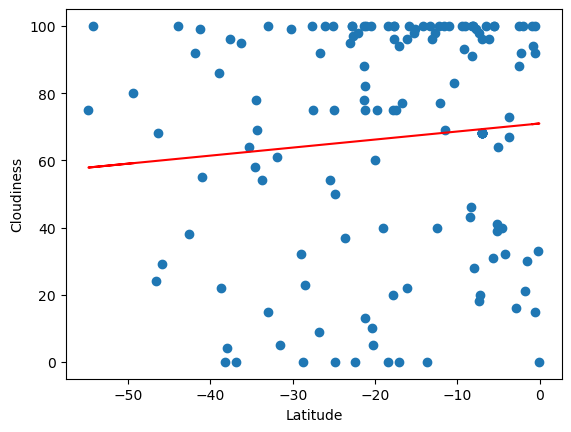

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
r_squared = rvalue**2

# Plot the values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
print(f"The rsquared-value is: {r_squared}")

Discussion about the linear relationship: In the Northern Hemisphere, 9% of the changes in Cloudiness can be explained by changes in Latitude. The r-value is roughly 0.30, meaning that there is a small, positive correlation betwee Latitude and Cloudiness. In the Southern Hemisphere, 0% of the changes in Cloudiness can be explained by changes in Latitude. The Southern Hemisphere's r-value is roughly 0.10, meaning that there is a very, very small, positive correlation between Latitude and Cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.013763505552762267
The rsquared-value is: 0.00018943408510091776


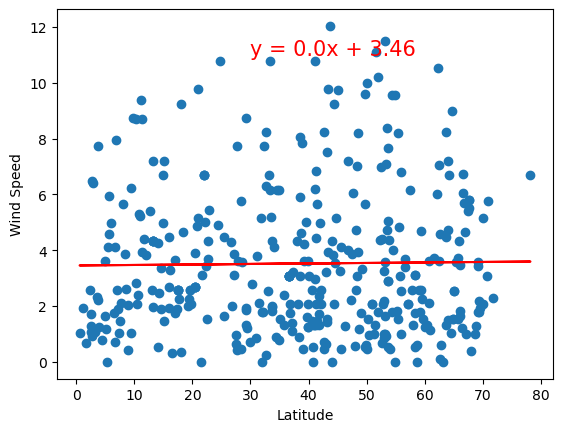

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
r_squared = rvalue**2

# Plot the values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(30,11),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
print(f"The rsquared-value is: {r_squared}")

The r-value is: -0.14068194770276335
The rsquared-value is: 0.01979141040944304


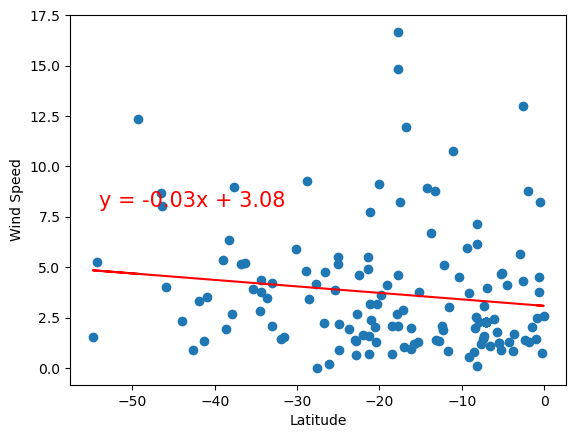

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
r_squared = rvalue**2

# Plot the values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-54,8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
print(f"The rsquared-value is: {r_squared}")

Discussion about the linear relationship: In the Northern Hemisphere, 0% of the changes in Wind Speed can be explained by changes in Latitude. The r-value is roughly -0.04, meaning that there is a small, negative correlation betwee Latitude and Wind Speed. In the Southern Hemisphere, 9.0% of the changes in Wind Speed can be explained by changes in Latitude. The Southern Hemisphere's r-value is roughly -0.31, meaning that there is a slight, negative correlation between Latitude and Wind Speed. 